# Kalorimetrie Laborversuch

Author: Adrian Gabel

Datum: 01.12.2023

Gruppe: 16

## Forschungsfrage

-Wie genau lässt sich die spezifische Wärmekapazität verschiedener Proben mit einem einfachen Laborversuch bestimmen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.


![Laborversuch Aufbau](Laborversuch_1.jpeg)

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Kalorimeterkonstante/Kalorimeterkonstante.h5"

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
group_path = "RawData"
data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)
# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = np.array([data_dict["temperature"][0],data_dict["temperature"][1],data_dict["temperature"][2]])
index_environment = np.array([data_dict["temperature"][3]])

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_environment)

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


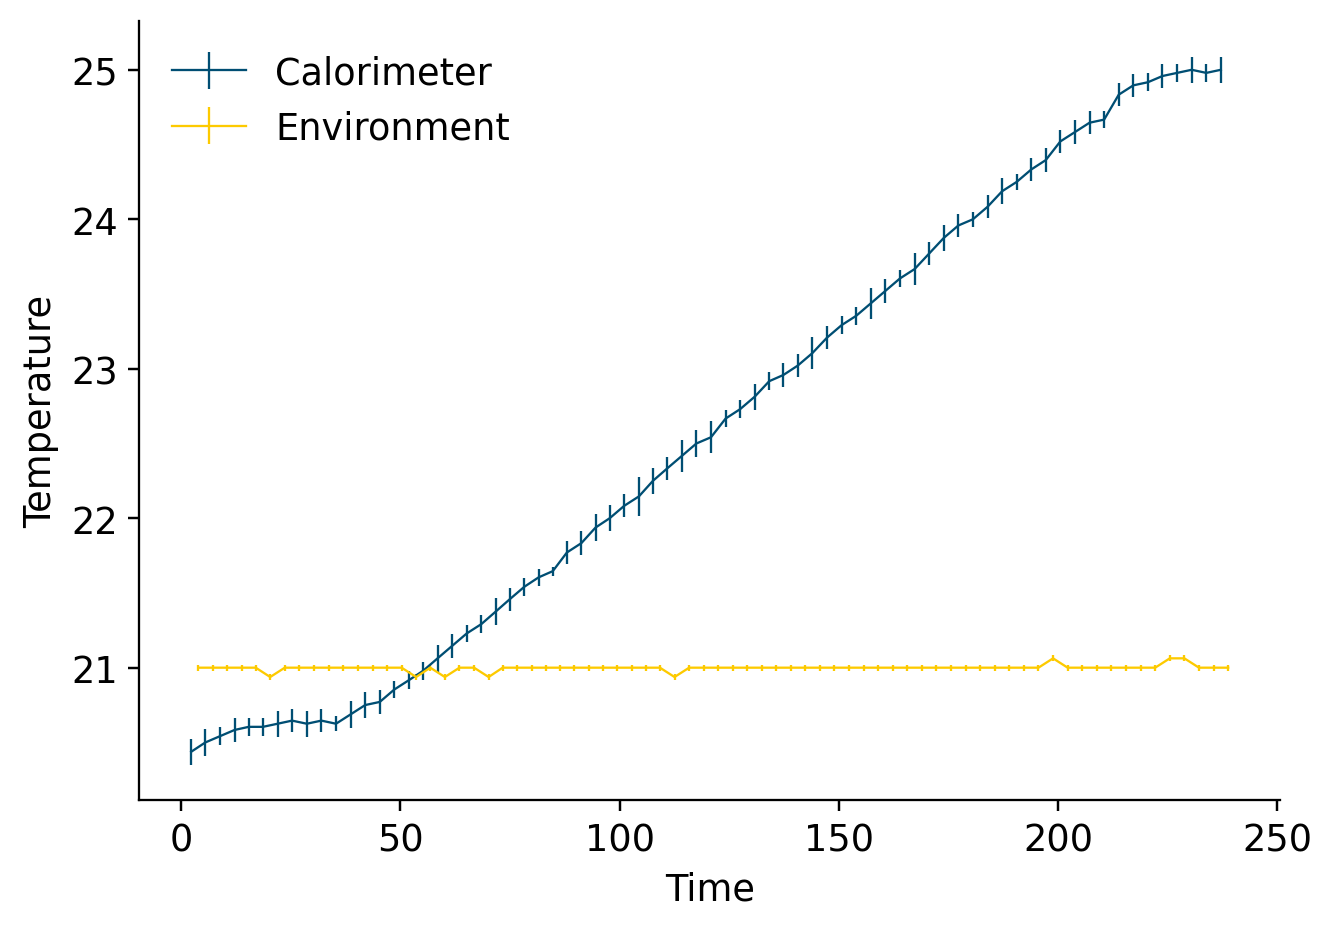

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
mean_std_data = [mean_std_calorimeter,mean_std_environment]
time = [data_dict["timestamp"][1],data_dict["timestamp"][3]]
legend = ["Calorimeter", "Environment"]
x_label = "Time"
y_label = "Temperature"

utility.plot_temp_over_time(mean_std_data,time,legend,x_label,y_label)

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
import json
with open ("data/Kalorimeterkonstante/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json") as json_file:
    calorimeter = json.load(json_file)

water_mass = calorimeter['calorimeter']['medium']['mass']['value']

# DONE #

In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
f = h5.File(datafile_path_const, "r")
sensor = f["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]
current = np.array(sensor["current"])
heat_time = np.array(sensor["heat_time"])
voltage = np.array(sensor["voltage"])
# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
print(calorimeter_const,"kJ/K")

2015.971717568496 kJ/K


### spezifische Wärmekapazität: erste Probe


![Laborversuch Probe in Warmwasserbad](Laborversuch_2.jpeg)

#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/probe_PDC007/probe_PDC007.h5"

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = "RawData"
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, group_path)

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = np.array([data_dict["temperature"][0],data_dict["temperature"][1],data_dict["temperature"][2]])
index_env = np.array([data_dict["temperature"][3]])
index_bath = np.array([data_dict["temperature"][4]])

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

# DONE #

#### (iii) Daten ploten

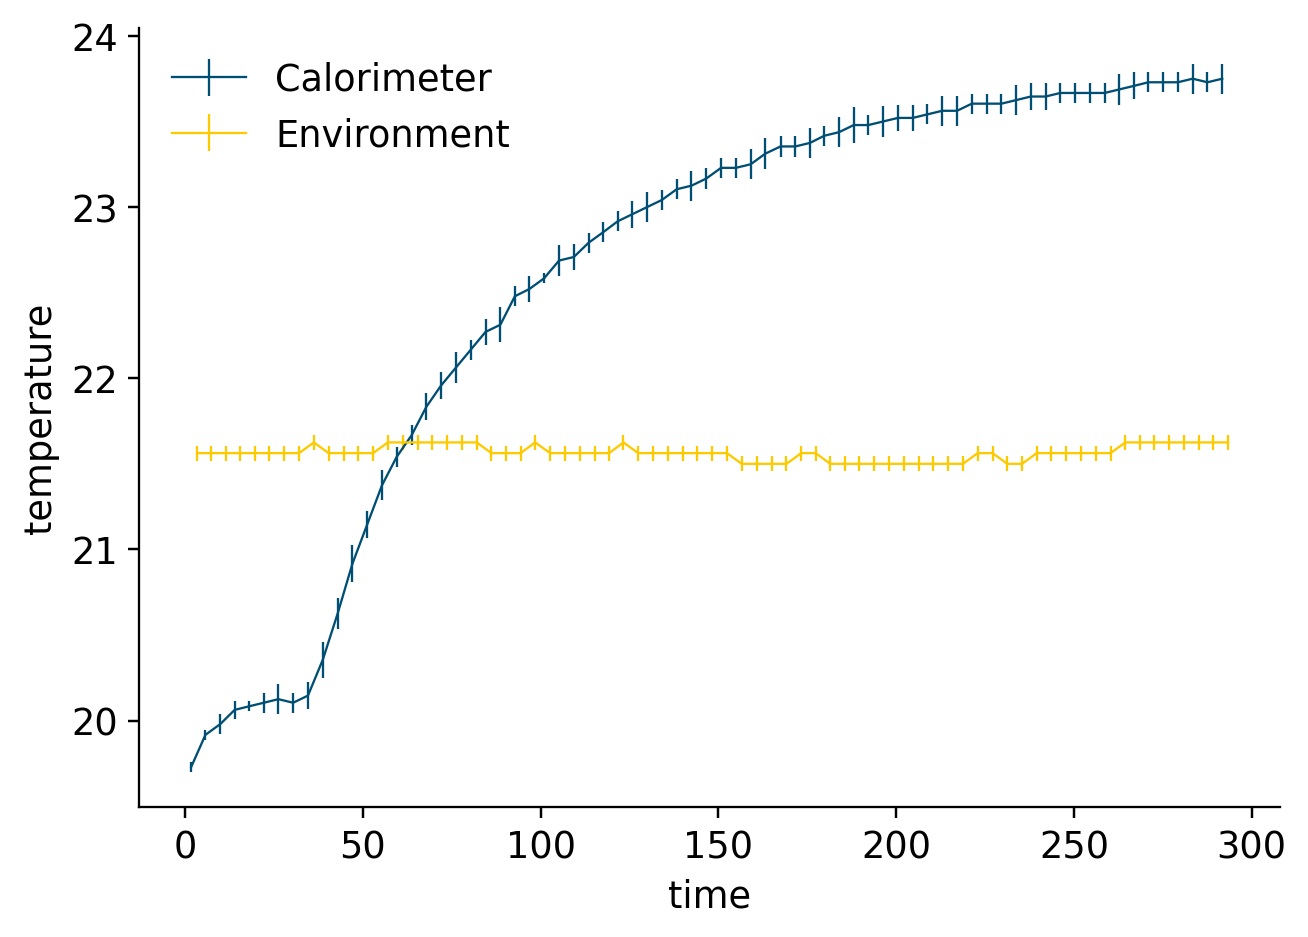

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

mean_std_data = [mean_std_calorimeter, mean_std_environment]
time = [data_dict["timestamp"][1],data_dict["timestamp"][3]]
legend = ["Calorimeter", "Environment"]
x_label = "time"
y_label = "temperature"
utility.plot_temp_over_time(mean_std_data, time, legend, x_label, y_label)

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.

with open ("data/probe_PDC007/probe_PDC007_1ee57b33-4e09-6211-b53e-6567f0eab32f.json") as json_file:
    pdc007 = json.load(json_file)
sample_mass = pdc007["probe"]["mass"]["value"]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][len(mean_std_heater[0])-10:])


# DONE #

![Laborversuch Probe in Kalorimeter](Laborversuch_3.jpeg)

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [21]:
print(sample_heat_capa,"kJ/kgK")

1.2098251615017575 kJ/kgK


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/probe_PDC015/probe_PDC015.h5"

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = "RawData"
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, group_path)

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = np.array([data_dict["temperature"][0],data_dict["temperature"][1],data_dict["temperature"][2]])
index_bath = np.array([data_dict["temperature"][4]])
index_env = np.array([data_dict["temperature"][3]])

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

# DONE #

#### (iii) Daten ploten

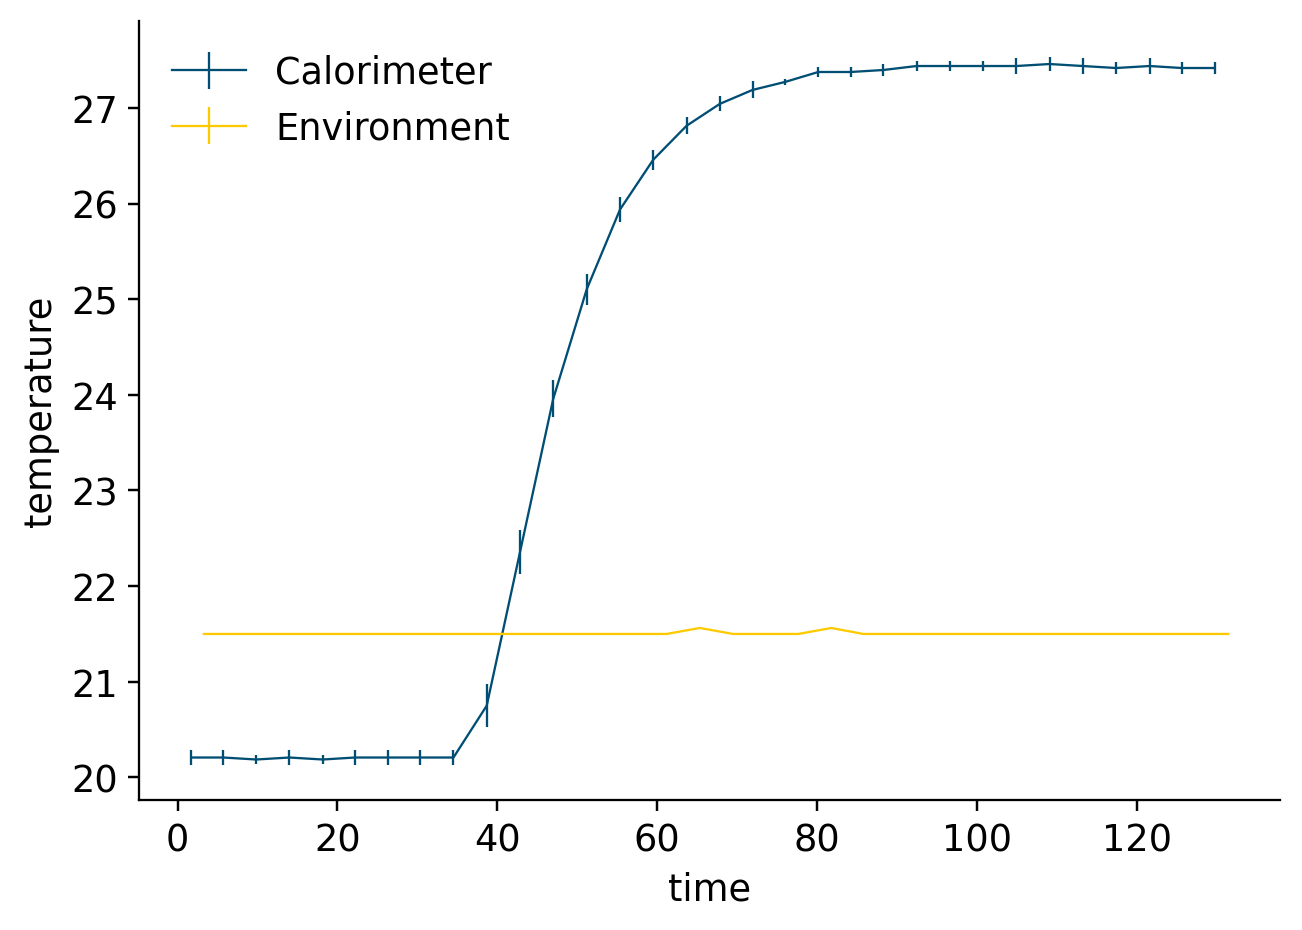

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

mean_std_data = [mean_std_calorimeter, mean_std_environment]
time = [data_dict["timestamp"][1],data_dict["timestamp"][3]]
legend = ["Calorimeter", "Environment"]
x_label = "time"
y_label = "temperature"
utility.plot_temp_over_time(mean_std_data, time, legend, x_label, y_label)

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

with open ("data/probe_PDC015/probe_PDC015_1ee57b3b-1882-62e4-8374-424a3fe06b1b.json") as json_file:
    pdc015 = json.load(json_file)
sample_mass = pdc015["probe"]["mass"]["value"]


# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
# DONE #

In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][len(mean_std_heater[0])-10:])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))
# DONE #

#### (Vii) Ergebnis

In [31]:
print(sample_heat_capa,"kJ/kgK")

0.4126823207183105 kJ/kgK


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/probe_PDC019/probe_PDC019.h5"

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = "RawData"
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, group_path)

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = np.array([data_dict["temperature"][0],data_dict["temperature"][1],data_dict["temperature"][2]])
index_bath = np.array([data_dict["temperature"][4]])
index_env = np.array([data_dict["temperature"][3]])

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

# DONE #

#### (iii) Daten ploten

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

mean_std_data = [mean_std_calorimeter, mean_std_environment]
time = [data_dict["timestamp"][1],data_dict["timestamp"][3]]
legend = ["Calorimeter", "Environment"]
x_label = "time"
y_label = "temperature"
utility.plot_temp_over_time(mean_std_data, time, legend, x_label, y_label)

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

with open ("data/probe_PDC019/probe_PDC019_1ee57b5f-6253-6438-a83f-4c0437beda63.json") as json_file:
    pdc019 = json.load(json_file)
sample_mass = pdc019["probe"]["mass"]["value"]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][len(mean_std_heater[0])-10:])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [41]:
print(sample_heat_capa,"kJ/kgK")

0.949924235911333 kJ/kgK


## Diskussion
Die im Laborversuch ermittelten spezifischen Wärmekapazitäten liegen mit Ausnahme der PVC-Probe sehr nahe an den tatsächlichen Werten. Die spezifische Wärmekapazität von PVC beträgt 0,9kJ/kgK, berechnet wurden 1,21kJ/kgK. Die spezifische Wärmekapazität von Messing beträgt 0,38 kJ/kgK, berechnet wurden 0,41 kJ/kgK, und die spezifische Wärmekapazität von Aluminium beträgt 0,89 kJ/kgK, berechnet wurden 0,95 kJ/kgK. Die mit der Probe transportierte Wassermenge aus dem Heißwasserbad hätte die berechnete spezifische Wärmekapazität verringert, der berechnete Wert ist jedoch höher als erwartet. Dies kann darauf zurückzuführen sein, dass die berechnete Kalorimeterkonstante zu groß ist.

## Fazit
Dieser Versuch hat mir demonstriert, dass man mit eigenen Versuchen realistische Ergebnisse erreichen kann und wie wichtig es ist, jegliche Daten und Metadaten einheitlich zu speichern, damit diese wiederverwendbar sind.